In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, SpectralClustering

## Tasks on Simulation Dataset

In [4]:
df_ellip = pd.read_csv(filepath_or_buffer='elliptical.txt', delimiter=" ", header=None)
df_sq = pd.read_csv(filepath_or_buffer='square.txt', delimiter=" ", header=None)

## Elliptical Clustering

/Users/ayjmax/Desktop/CSE 347/.venv/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


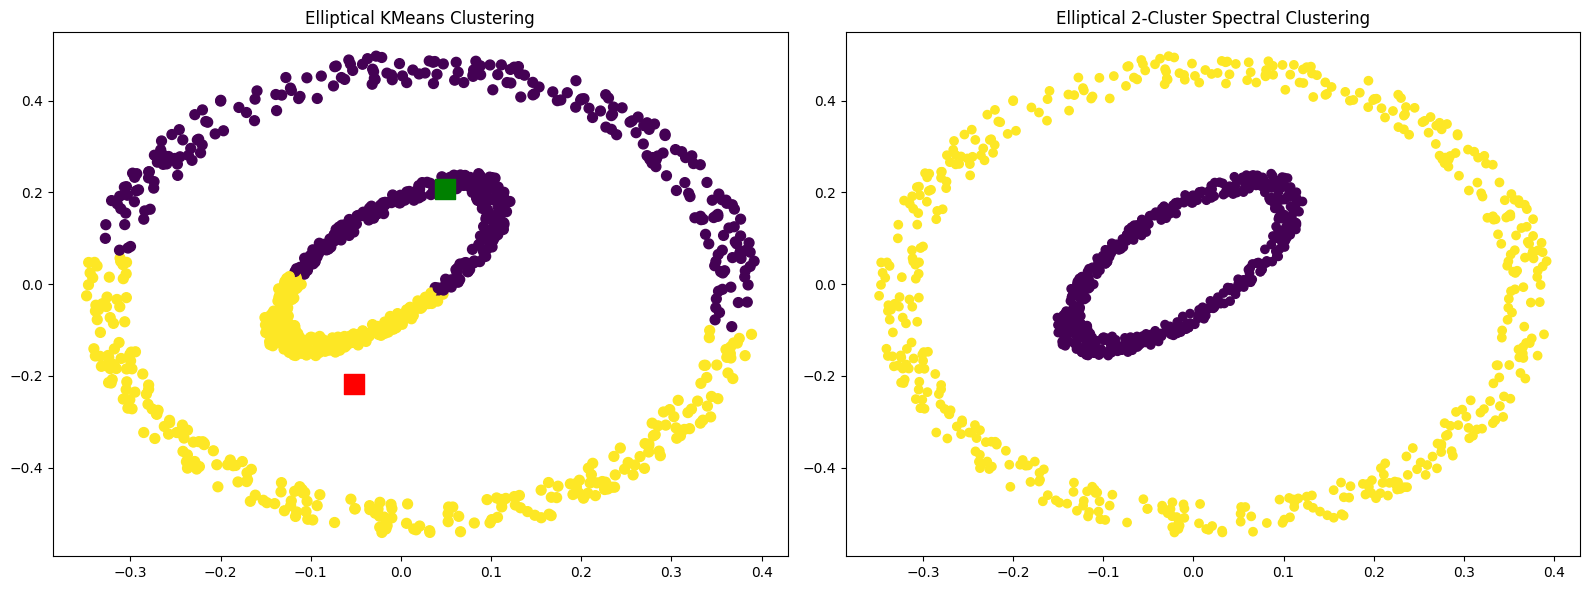

In [5]:
# Training the model with optimal no of clusters
ellip_km_clustering = KMeans(n_clusters=2, init='k-means++', random_state=0)
ellip_km_clustering.fit(df_ellip)

# Perform Spectral Clustering
ellip_s_clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='discretize', random_state=0)
ellip_s_clustering.fit(df_ellip)

# Creating subplots
plt.figure(figsize=(16, 6))

# KMeans
plt.subplot(1, 2, 1)
plt.scatter(df_ellip.iloc[:,0], df_ellip.iloc[:,1], s=50, c=ellip_km_clustering.labels_, cmap='viridis',)
plt.scatter(
    x=ellip_km_clustering.cluster_centers_[0][0],
    y=ellip_km_clustering.cluster_centers_[0][1], s=200, c='g', marker='s')
plt.scatter(
    x=ellip_km_clustering.cluster_centers_[1][0],
    y=ellip_km_clustering.cluster_centers_[1][1], s=200, c='r', marker='s')
plt.title('Elliptical KMeans Clustering')

# Spectral Clustering
plt.subplot(1, 2, 2)
plt.scatter(df_ellip[0], df_ellip[1], c=ellip_s_clustering.labels_, cmap='viridis', marker='o')
plt.title('Elliptical 2-Cluster Spectral Clustering')

plt.tight_layout()
plt.show()

## Square Clustering

/Users/ayjmax/Desktop/CSE 347/.venv/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


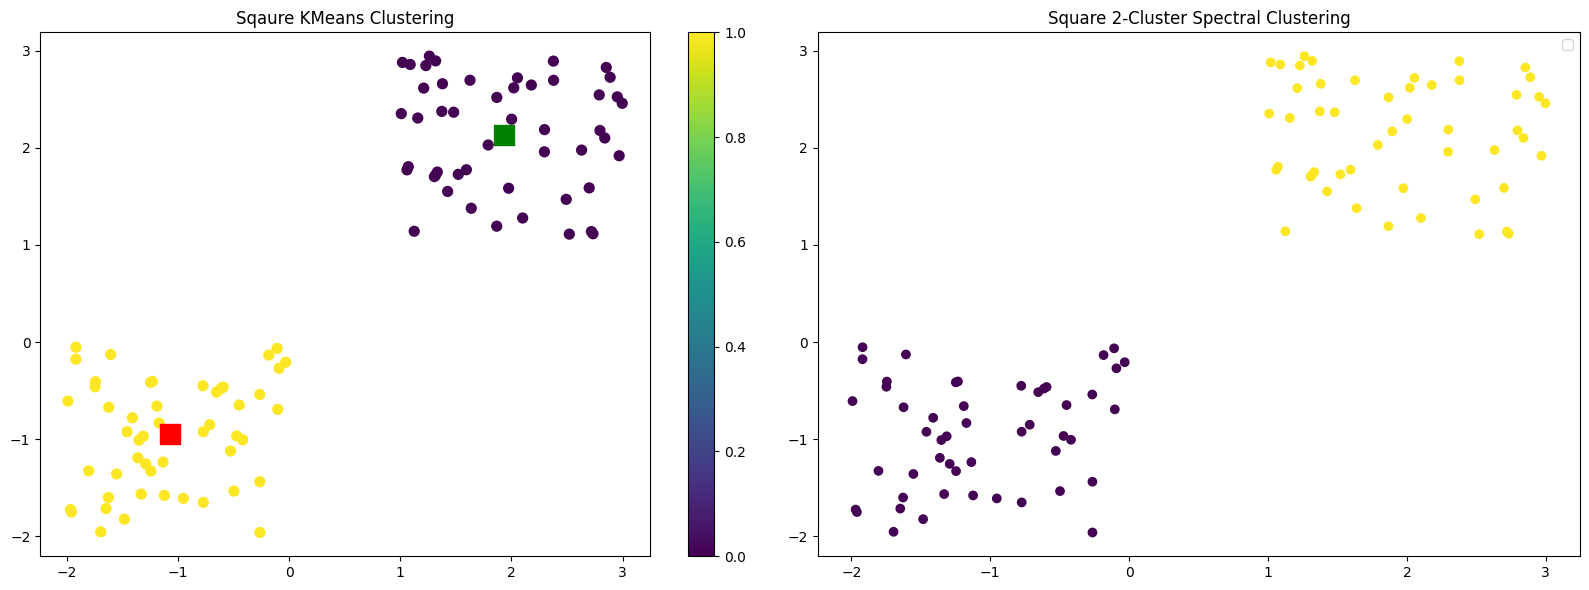

In [7]:
# Training the model with optimal no of clusters
sq_km_clustering = KMeans(n_clusters=2, init='k-means++', random_state=0)
sq_km_clustering.fit(df_sq)

# Perform Spectral Clustering
sq_s_clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='discretize', random_state=0)
sq_s_clustering.fit(df_sq)

# Creating subplots
plt.figure(figsize=(16, 6))

# KMeans
plt.subplot(1, 2, 1)
plt.scatter(df_sq.iloc[:,0], df_sq.iloc[:,1], s=50, c=sq_km_clustering.labels_, cmap='viridis',)
plt.scatter(
    x=sq_km_clustering.cluster_centers_[0][0],
    y=sq_km_clustering.cluster_centers_[0][1], s=200, c='g', marker='s')
plt.scatter(
    x=sq_km_clustering.cluster_centers_[1][0],
    y=sq_km_clustering.cluster_centers_[1][1], s=200, c='r', marker='s')
plt.title('Sqaure KMeans Clustering')
plt.colorbar()


# Spectral Clustering
plt.subplot(1, 2, 2)
plt.scatter(df_sq[0], df_sq[1], c=sq_s_clustering.labels_, cmap='viridis', marker='o')
plt.title('Square 2-Cluster Spectral Clustering')
plt.colorbar()


plt.tight_layout()
plt.show()

In [ ]:
df_cho = pd.read_csv(filepath_or_buffer='cho.txt', delimiter="\t", header=None)
df_cho_id = df_cho[0].copy()
df_cho_truth = df_cho[1].copy()

df_cho.drop([0, 1], axis=1, inplace=True)
df_cho.columns = range(df_cho.shape[1])

df_cho

In [ ]:
# Training the model with optimal no of clusters
tuned_clustering = KMeans(n_clusters=2, init='k-means++', random_state=0)
labels = tuned_clustering.fit_predict(df_cho)

# x and y coordinates of all clusters
# Centroids of clusters
tuned_clustering.cluster_centers_[:]